In [1]:
import pandas as pd

csv_path= pd.read_csv("housing.csv")

In [2]:
csv_path.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
csv_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
csv_path["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
csv_path.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

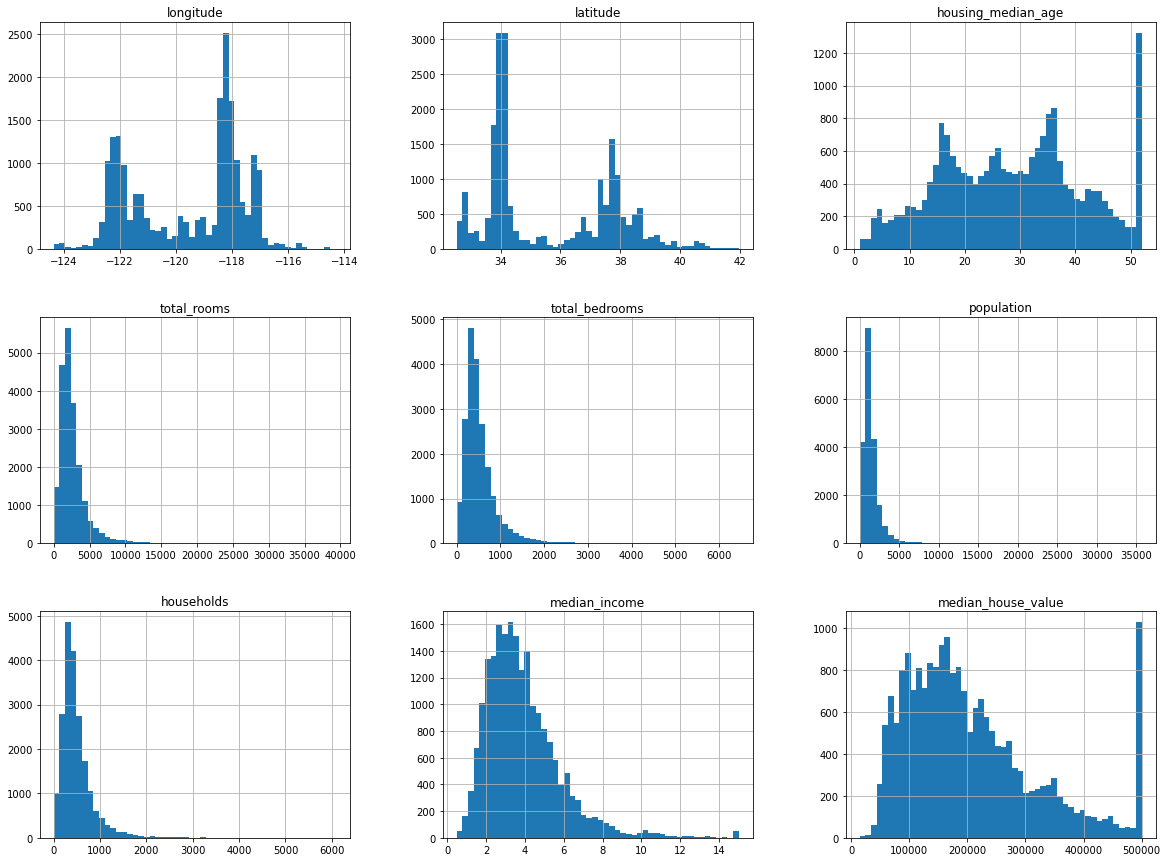

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
csv_path.hist(bins=50, figsize=(20,15))
#plt.show()

In [7]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(csv_path,0.2)
print (len(train_set), "train +", len(test_set),"test")

16512 train + 4128 test


In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(csv_path,test_size=0.2, random_state=42)

In [10]:
csv_path["income_cat"] = np.ceil(csv_path["median_income"]/1.5)
csv_path["income_cat"].where(csv_path["income_cat"]<5,5.0, inplace=True)

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(csv_path,csv_path["income_cat"]):
    strat_train_set = csv_path.loc[train_index]
    strat_test_set = csv_path.loc[test_index]

In [12]:
csv_path["income_cat"].value_counts()/len(csv_path)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [14]:
csv_path =  strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

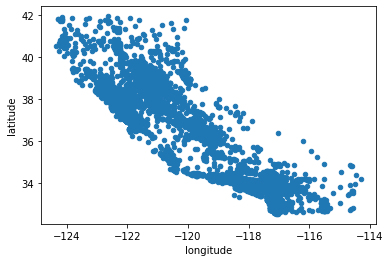

In [15]:
csv_path.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

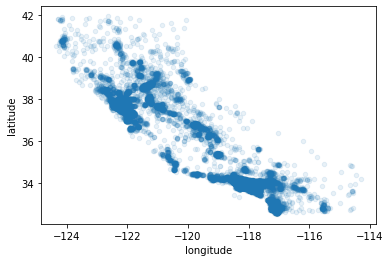

In [16]:
csv_path.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

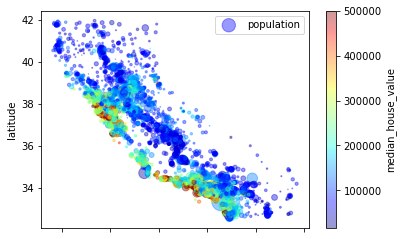

In [17]:
csv_path.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=csv_path["population"]/100,
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )
plt.legend()

In [18]:
corr_matrix = csv_path.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [20]:
!pip install pandas

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

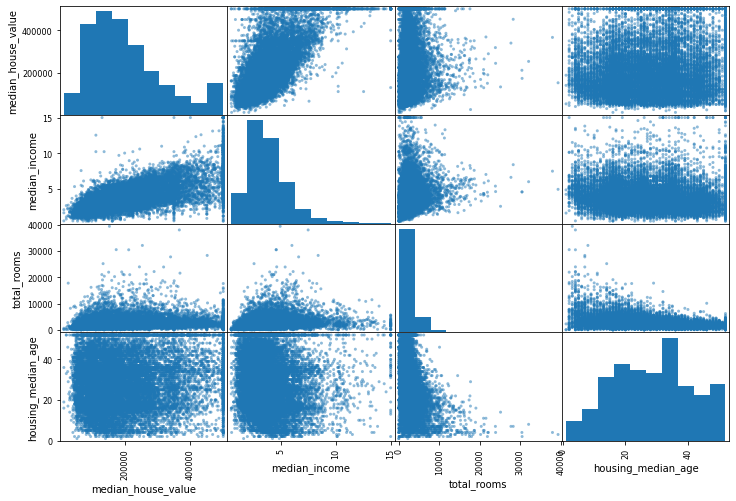

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(csv_path[attributes], figsize= (12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

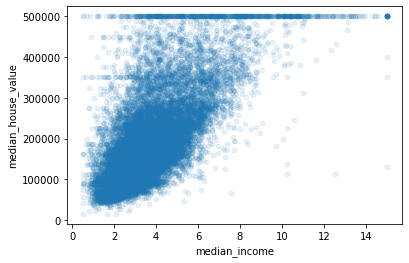

In [22]:
csv_path.plot(kind = "scatter", x="median_income", y="median_house_value", alpha=0.1)

In [23]:
csv_path["rooms_per_household"] = csv_path["total_rooms"]/csv_path["households"]
csv_path["bedrooms_per_room"] = csv_path["total_bedrooms"]/csv_path["total_rooms"]
csv_path["population_per_household"] = csv_path["population"]/csv_path["households"]

In [24]:
corr_matrix = csv_path.corr()

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [26]:
csv_path = strat_train_set.drop("median_house_value", axis=1)
csv_path_labels = strat_train_set["median_house_value"].copy()

In [27]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy="median")

In [28]:
csv_path_num= csv_path.drop("ocean_proximity", axis=1)

In [29]:
imputer.fit(csv_path_num)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
csv_path_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
X = imputer.transform(csv_path_num)

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
csv_path_cat = csv_path["ocean_proximity"]
csv_path_cat_encoded = encoder.fit_transform(csv_path_cat)
csv_path_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [34]:
print (encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
csv_path_cat_1hot = encoder.fit_transform(csv_path_cat_encoded.reshape(-1,1))
csv_path_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
csv_path.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [37]:
csv_path_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
csv_path_cat_1hot = encoder.fit_transform(csv_path_cat)
csv_path_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
csv_path_extra_attribs = attr_adder.transform(csv_path.values)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

csv_path_num_tr = num_pipeline.fit_transform(csv_path_num)

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values   

In [42]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(csv_path_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy= 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [43]:
csv_path_prepared = full_pipeline.fit_transform(csv_path)
csv_path_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values   

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(csv_path_prepared,csv_path_labels)

LinearRegression()

In [46]:
some_data = csv_path.iloc[: 5]
some_labels = csv_path_labels.iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: \t", lin_reg.predict(some_data_prepared))    

Predictions: 	 [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [47]:
print("Labels: \t\t", list(some_labels))

Labels: 		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [48]:
from sklearn.metrics import mean_squared_error
csv_path_predictions = lin_reg.predict(csv_path_prepared)
lin_mse = mean_squared_error(csv_path_labels, csv_path_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

4709785076.060029

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(csv_path_prepared, csv_path_labels)

DecisionTreeRegressor()

In [50]:
csv_path_predictions = tree_reg.predict(csv_path_prepared)
tree_mse = mean_squared_error(csv_path_labels, csv_path_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, csv_path_prepared, csv_path_labels, scoring = "neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print('Scores: ', scores)
    print("Mean: ", scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(rmse_scores)

Scores:  [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean:  71432.52332065887
Standard Deviation:  2696.6824522410743


In [53]:
lin_scores = cross_val_score(lin_reg, csv_path_prepared, csv_path_labels, scoring = "neg_mean_squared_error", cv =10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180634


In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(csv_path_prepared, csv_path_labels)

RandomForestRegressor()

In [55]:
csv_path_predictions = forest_reg.predict(csv_path_prepared)
forest_mse = mean_squared_error(csv_path_labels, csv_path_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18733.78842762556

In [56]:
forest_scores = cross_val_score(forest_reg, csv_path_prepared, csv_path_labels, scoring = "neg_mean_squared_error", cv =10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:  [51340.22553753 49240.079874   46976.40445657 51917.1921677
 47035.53338226 51829.80557131 52841.15437862 49525.18429381
 47962.29506428 54069.20606905]
Mean:  50273.7080795117
Standard Deviation:  2357.685647654302


In [57]:
from sklearn import svm

svm_reg = svm.SVR()
svm_reg.fit(csv_path_prepared, csv_path_labels)

SVR()

In [58]:
csv_path_predictions = svm_reg.predict(csv_path_prepared)
svm_mse = mean_squared_error(csv_path_labels, csv_path_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118578.69234925653

In [59]:
svm_scores = cross_val_score(svm_reg, csv_path_prepared, csv_path_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)

display_scores(svm_rmse_scores)

Scores:  [116729.13778306 120113.99351281 113925.04340616 120399.11878641
 114687.49942071 122785.64737282 119853.79338279 118280.31108193
 120230.82615529 118840.1885232 ]
Mean:  118584.55594251942
Standard Deviation:  2609.6120823493407


In [60]:
#import joblib

#joblib.dump(RandomForestRegressor, "RFR.pkl")

#my_model_loaded = joblib.load("svm.pkl")

In [61]:
#import joblib

#joblib.dump(DecisionTreeRegressor, "DTR.pkl")

#my_model_loaded = joblib.load("svm.pkl")

In [62]:
#import joblib

#joblib.dump(LinearRegression, "LR.pkl")

#my_model_loaded = joblib.load("svm.pkl")

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimator':[4,10,30], 'max features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimator': [4,10], 'max feature': [2,3,4,6]},
    
]


In [64]:
tree_reg = DecisionTreeRegressor()
    
grid_search = GridSearchCV(tree_reg, param_grid, cv=10, scoring="neg_mean_squared_error")

grid_search.fit(csv_path_prepared, csv_path_labels)

ValueError: Invalid parameter max features for estimator DecisionTreeRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
cvres = grid_search.cv_results
for mean_score, params in zip(cvres["mean_tset_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)